<a href="https://colab.research.google.com/github/mlupu98/DataRes-Sports-F19/blob/master/NBA_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv("nba.csv")
df1 = df.drop_duplicates(['teamAbbr','teamFTA', 'teamFTM', 'opptAbbr', 'opptFTA', 'opptFTM'], keep= 'last')
#df1 = df1[df1.index % 2 == 0]
df1.head()

,offLNm,offFNm,teamAbbr,teamLoc,teamRslt,teamFTA,teamFTM,teamFT%,opptAbbr,opptConf,opptLoc,opptRslt,opptFTA,opptFTM,opptFT%
2,Workman,Haywoode,WAS,Away,Loss,20,12,0.6000,CLE,East,Home,Win,22,15,0.6818
5,Workman,Haywoode,CLE,Home,Win,22,15,0.6818,WAS,East,Away,Loss,20,12,0.6000
8,Fitzgerald,Kane,BOS,Away,Loss,28,23,0.8214,MIA,East,Home,Win,32,26,0.8125
11,Fitzgerald,Kane,MIA,Home,Win,32,26,0.8125,BOS,East,Away,Loss,28,23,0.8214
14,Dalen,Eric,DAL,Away,Win,18,14,0.7778,LAL,West,Home,Loss,31,12,0.3871


In [0]:
teams = df1.teamAbbr.unique()
teams

array(['WAS', 'CLE', 'BOS', 'MIA', 'DAL', 'LAL', 'DEN', 'PHI', 'IND',
       'TOR', 'HOU', 'DET', 'SAC', 'CHI', 'SA', 'NO', 'UTA', 'GS', 'PHO',
       'MEM', 'LAC', 'POR', 'OKC', 'ORL', 'CHA', 'MIL', 'ATL', 'NY',
       'MIN', 'BKN'], dtype=object)

In [0]:
column = ','.join(map(str, teams))
column = 'Team,Home,Away,Combined,Against,' + column
column = column.split(",")
result = pd.DataFrame(index = range(teams.size), columns = column)
result.head()
#%pprint
#column

,Team,Home,Away,Combined,Against,WAS,CLE,BOS,MIA,DAL,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
idx = 0
while (idx < teams.size):
    home = df1[((df1['teamAbbr'] == teams[idx]) & (df1['teamLoc'] == 'Home'))]
    away = df1[((df1['teamAbbr'] == teams[idx]) & (df1['teamLoc'] == 'Away'))]
    combined = pd.concat([home, away])
    result['Team'].iloc[idx] = teams[idx]
    result['Home'].iloc[idx] = home['teamFTM'].sum() / home['teamFTA'].sum()
    result['Away'].iloc[idx] = away['teamFTM'].sum() / away['teamFTA'].sum()
    result['Combined'].iloc[idx] = combined['teamFTM'].sum() / combined['teamFTA'].sum()
    idx = idx + 1
result.head()

,Team,Home,Away,Combined,Against,WAS,CLE,BOS,MIA,DAL,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
0,WAS,0.760484,0.735878,0.748641,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLE,0.750574,0.760827,0.755657,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOS,0.777882,0.781444,0.779663,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIA,0.745584,0.741097,0.743459,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DAL,0.789483,0.774931,0.78275,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
idx = 0
while (idx < result.shape[0]):
    idx2 = 0
    home = df1[((df1['teamAbbr'] == teams[idx]) & (df1['teamLoc'] == 'Home'))]
    away = df1[((df1['teamAbbr'] == teams[idx]) & (df1['teamLoc'] == 'Away'))]
    away2 = df1[((df1['opptAbbr'] == teams[idx]) & (df1['teamLoc'] == 'Away'))]
    result['Against'].iloc[idx] = away2['teamFTM'].sum() / away2['teamFTA'].sum()
    #free throw % playing away at other teams
    while (idx2 < result.shape[0]):
        if (teams[idx2] != teams[idx]):
            result[teams[idx2]].iloc[idx] = (away[away['opptAbbr'] == teams[idx2]])['teamFTM'].sum() / (away[away['opptAbbr'] == teams[idx2]])['teamFTA'].sum()
        idx2 = idx2 + 1
    idx = idx + 1
result.head()

,Team,Home,Away,Combined,Against,WAS,CLE,BOS,MIA,DAL,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
0,WAS,0.760484,0.735878,0.748641,0.754681,NaN,0.770732,0.738532,0.74,0.707317,...,0.642857,0.699115,0.685039,0.737705,0.752033,0.746988,0.75431,0.69697,0.768519,0.726531
1,CLE,0.750574,0.760827,0.755657,0.757822,0.8125,NaN,0.768595,0.731092,0.769737,...,0.701613,0.703125,0.782051,0.758123,0.777328,0.771429,0.737255,0.753968,0.767241,0.748988
2,BOS,0.777882,0.781444,0.779663,0.750961,0.791667,0.797297,NaN,0.818584,0.834646,...,0.805556,0.801587,0.645161,0.788235,0.781915,0.798283,0.787234,0.790541,0.767677,0.775862
3,MIA,0.745584,0.741097,0.743459,0.763288,0.732558,0.734375,0.71134,NaN,0.726496,...,0.77027,0.722689,0.792793,0.760943,0.758475,0.765487,0.784861,0.729084,0.74359,0.771084
4,DAL,0.789483,0.774931,0.78275,0.752757,0.815603,0.821782,0.793103,0.752577,NaN,...,0.768519,0.830409,0.76555,0.709402,0.778689,0.818182,0.815126,0.854167,0.735484,0.791667


In [0]:
result.to_csv('freethrows.csv')
result.head()

,Team,Home,Away,Combined,Against,WAS,CLE,BOS,MIA,DAL,...,LAC,POR,OKC,ORL,CHA,MIL,ATL,NY,MIN,BKN
0,WAS,0.760484,0.735878,0.748641,0.754681,NaN,0.770732,0.738532,0.74,0.707317,...,0.642857,0.699115,0.685039,0.737705,0.752033,0.746988,0.75431,0.69697,0.768519,0.726531
1,CLE,0.750574,0.760827,0.755657,0.757822,0.8125,NaN,0.768595,0.731092,0.769737,...,0.701613,0.703125,0.782051,0.758123,0.777328,0.771429,0.737255,0.753968,0.767241,0.748988
2,BOS,0.777882,0.781444,0.779663,0.750961,0.791667,0.797297,NaN,0.818584,0.834646,...,0.805556,0.801587,0.645161,0.788235,0.781915,0.798283,0.787234,0.790541,0.767677,0.775862
3,MIA,0.745584,0.741097,0.743459,0.763288,0.732558,0.734375,0.71134,NaN,0.726496,...,0.77027,0.722689,0.792793,0.760943,0.758475,0.765487,0.784861,0.729084,0.74359,0.771084
4,DAL,0.789483,0.774931,0.78275,0.752757,0.815603,0.821782,0.793103,0.752577,NaN,...,0.768519,0.830409,0.76555,0.709402,0.778689,0.818182,0.815126,0.854167,0.735484,0.791667


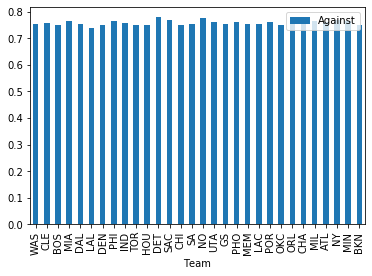

In [0]:
import matplotlib.pyplot as plt
result.plot(kind='bar',x='Team',y='Against')

In [0]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

plot = figure(x_range = result['Team'], plot_height = 500, plot_width = 900, title = 'NBA', tools = ['pan, box_zoom, box_select'])
plot.vbar(x = result['Team'], top = result['Against'], width = .9, selection_color = 'red', nonselection_color = 'gray')

show(plot)

Loading BokehJS ...